## Load Data

In [1]:
import pandas as pd
import numpy as np

original_data = pd.read_excel('2017임산물생산조사.xlsx')
original_data.head(3)

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,서울특별시,종로구,341235.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,36920,3000,110760000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24
2,서울특별시,중구,341243.0,채취,NaN,0,0,㎡,수실,재배수실,은행,kg,22720,3000,68160000,3영급 (20년생 이상)의 나무,NaN,A1001P101,2018-04-24,2018-04-24


In [2]:
data = original_data.iloc[1:, [1, 3, 5, 7, 10, 12]]
data.rename(columns={'구분(재배/채취)' : '재배채취',
                     '구분(재배/채취).1' : '재배기준',
                     '구분(재배/채취).2' : '재배면적',
                     '구분(재배/채취).3' : '재배단위',
                     'Unnamed: 6' : '환산면적',
                     '품목' : '품목 대분류',
                     '품목.1' : '품목 중분류',
                     '품목.2' : '품목 소분류',
                     '최종값' : '생산량'},
            inplace = True)
data.head()

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
1,종로구,채취,0,㎡,은행,36920
2,중구,채취,0,㎡,은행,22720
3,용산구,채취,0,㎡,은행,41440
4,성동구,채취,0,㎡,은행,9960
5,광진구,채취,0,㎡,은행,12800


In [3]:
data = data[data['품목 소분류'].isin(['밤', '호두', '대추', '떫은감', '건표고', '생표고', '더덕', '오미자'])]
data

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,10,평,더덕,5
203,달성군,재배,150,평,오미자,20
213,달성군,재배,400,평,오미자,15
247,달성군,재배,400,평,오미자,5
285,달성군,재배,40,평,오미자,20
...,...,...,...,...,...,...
106361,서귀포시,재배,246404,봉,생표고,163775
106362,제주시,재배,99500,㎡,떫은감,1464
106363,제주시,재배,297033,봉,건표고,21140
106364,제주시,재배,297033,봉,생표고,47394


In [4]:
data['품목 소분류'].value_counts()

오미자    5610
더덕     2182
생표고     154
대추      140
밤       136
건표고     135
떫은감     129
호두       86
Name: 품목 소분류, dtype: int64

In [5]:
data['재배단위'].value_counts()

평     7477
㎡      620
봉      289
ha     185
Name: 재배단위, dtype: int64

### Cheack NaNs

In [6]:
data.isnull().sum()

시군구/관리소    0
재배채취       0
재배면적       0
재배단위       1
품목 소분류     0
생산량        0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)
data

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,10,평,더덕,5
203,달성군,재배,150,평,오미자,20
213,달성군,재배,400,평,오미자,15
247,달성군,재배,400,평,오미자,5
285,달성군,재배,40,평,오미자,20
...,...,...,...,...,...,...
106361,서귀포시,재배,246404,봉,생표고,163775
106362,제주시,재배,99500,㎡,떫은감,1464
106363,제주시,재배,297033,봉,건표고,21140
106364,제주시,재배,297033,봉,생표고,47394


# variable preprocessing and Visualization

### 시군구/관리소

In [8]:
data['시군구/관리소'].value_counts()

문경시    1154
장수군     605
무주군     548
단양군     384
거창군     375
       ... 
전주시       1
수성구       1
신안군       1
강서구       1
구리시       1
Name: 시군구/관리소, Length: 167, dtype: int64

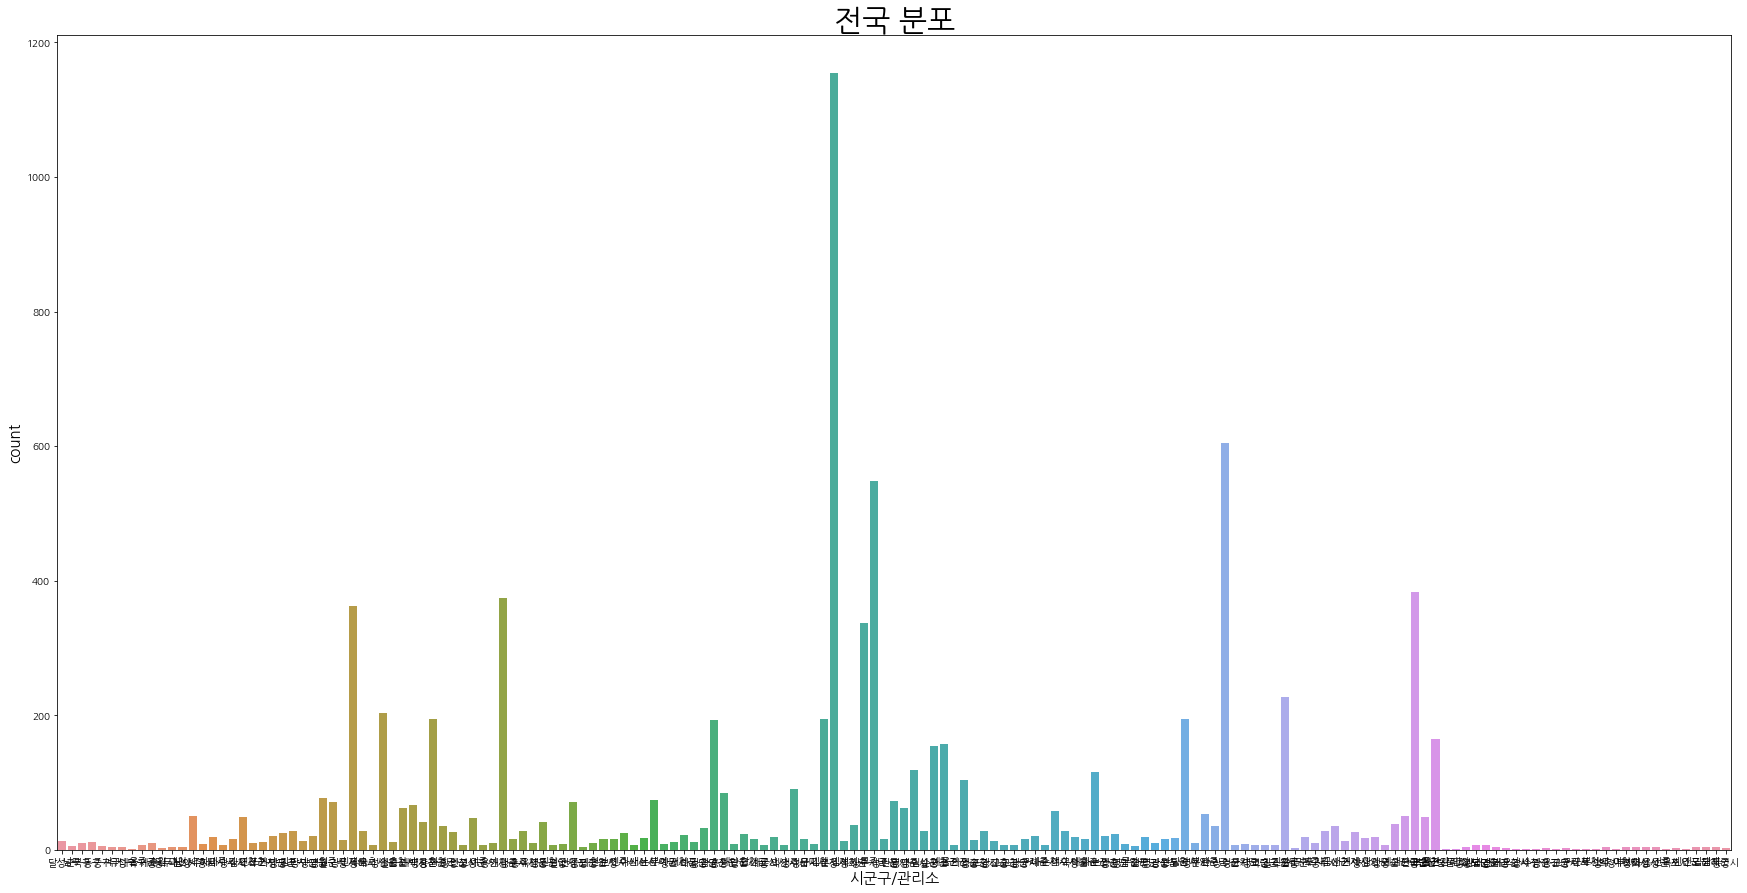

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic' # mac os : AppleGothic
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="시군구/관리소", data=data)
plt.title('전국 분포', fontsize=30)
plt.show()

### 재배채취

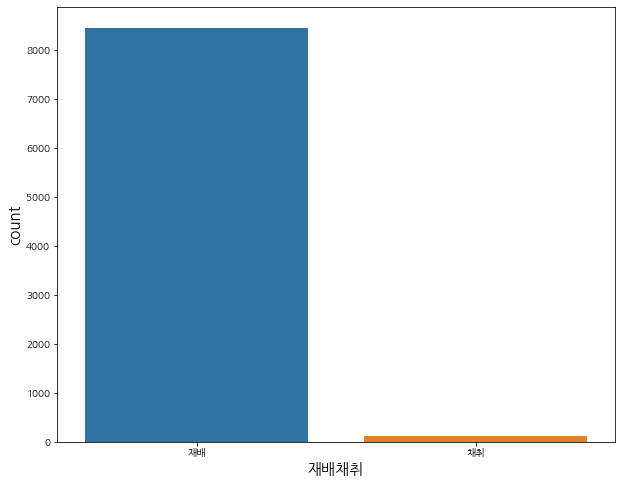

In [10]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배채취", data=data)
plt.show()

### 재배단위

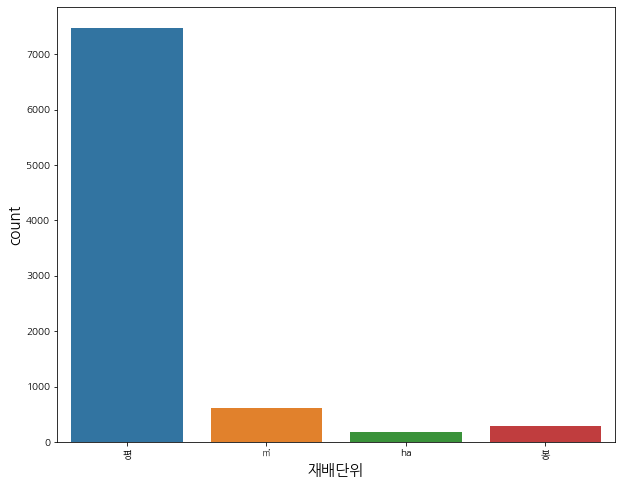

In [11]:
ax = plt.figure(figsize=(10,8))
sns.countplot(x="재배단위", data=data)
plt.show()

### 재배면적

In [12]:
#data.replace({'환산면적': {0 : np.NaN}},
#             inplace=True)
#data.dropna(axis=0, inplace=True)

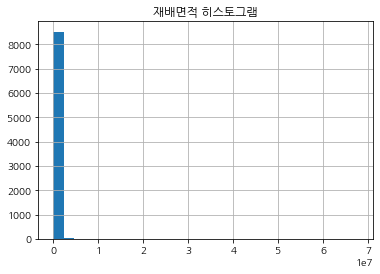

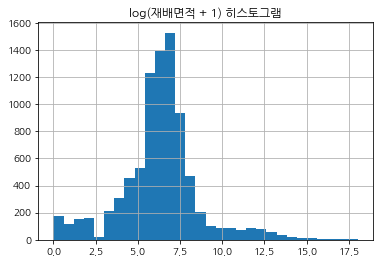

In [13]:
data['재배면적'].hist(bins=30)
plt.title('재배면적 히스토그램')
plt.show()

pd.Series(np.log1p(data['재배면적'].astype(float))).hist(bins=30)
plt.title('log(재배면적 + 1) 히스토그램')
plt.show()

In [14]:
data['재배면적'] = np.log1p(data['재배면적'].astype(float))
data.head()

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,2.397895,평,더덕,5
203,달성군,재배,5.017280,평,오미자,20
213,달성군,재배,5.993961,평,오미자,15
247,달성군,재배,5.993961,평,오미자,5
285,달성군,재배,3.713572,평,오미자,20


### 품목 소분류

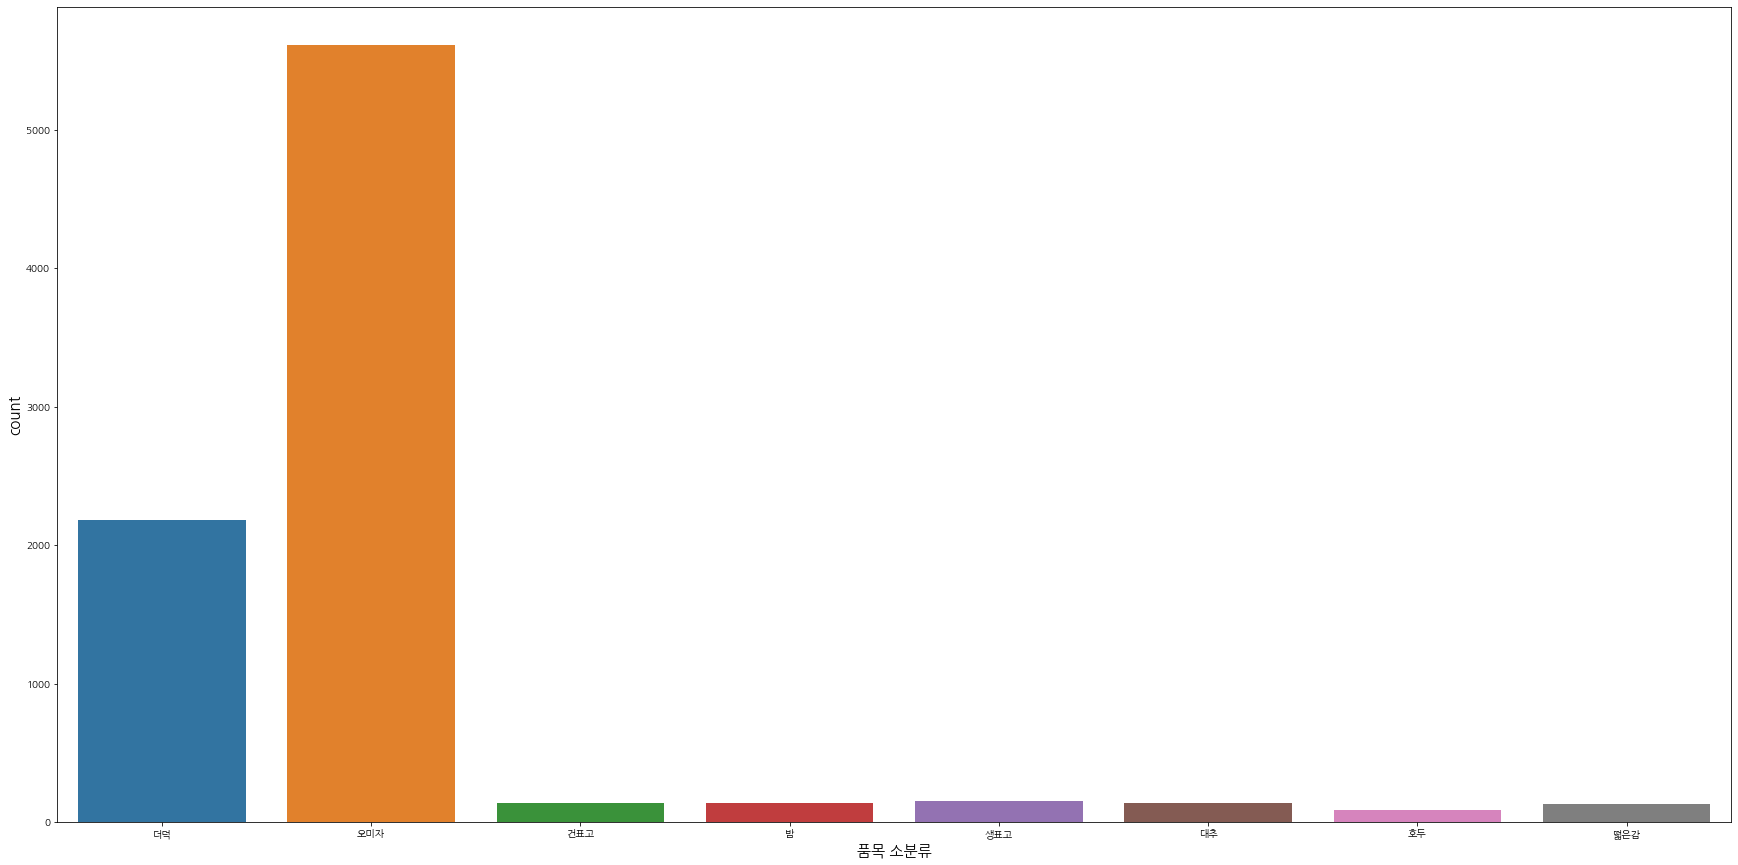

In [15]:
plt.rcParams["axes.labelsize"] = 15

ax = plt.figure(figsize=(30,15))
sns.countplot(x="품목 소분류", data=data)
plt.show()

### 생산량

In [16]:
#data.replace({'생산량': {0 : np.NaN}},
#             inplace=True)
#data.dropna(axis=0, inplace=True)

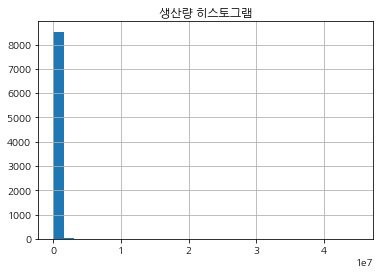

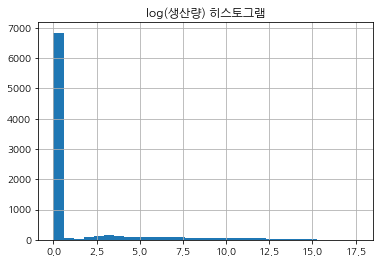

In [17]:
data['생산량'].hist(bins=30)
plt.title('생산량 히스토그램')
plt.show()

pd.Series(np.log1p(data['생산량'].astype(float))).hist(bins=30)
plt.title('log(생산량) 히스토그램')
plt.show()

In [18]:
data['생산량'] = np.log1p(data['생산량'].astype(float))
data.head()

,시군구/관리소,재배채취,재배면적,재배단위,품목 소분류,생산량
172,달성군,재배,2.397895,평,더덕,1.791759
203,달성군,재배,5.017280,평,오미자,3.044522
213,달성군,재배,5.993961,평,오미자,2.772589
247,달성군,재배,5.993961,평,오미자,1.791759
285,달성군,재배,3.713572,평,오미자,3.044522


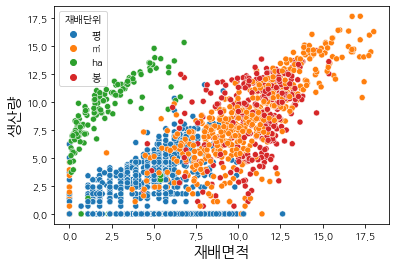

In [19]:
sns.scatterplot(x='재배면적', y='생산량', data=data, hue='재배단위')
plt.show()

## Numerical Variable processing

In [20]:
from sklearn.preprocessing import MinMaxScaler
# column 별로 scaling 되는 것이 아님 주의

X_minmax_scaler = MinMaxScaler()
X_minmax_scaler.fit(data.loc[:, ['재배면적']])
X_scaled = X_minmax_scaler.transform(data.loc[:, ['재배면적']])
X_scaled

array([[0.13299905],
       [0.27828299],
       [0.33245455],
       ...,
       [0.69894675],
       [0.69894675],
       [0.33408731]])

In [21]:
y_minmax_scaler = MinMaxScaler()
y_minmax_scaler.fit(data.loc[:, ['생산량']])
y_scaled = y_minmax_scaler.transform(data.loc[:, ['생산량']])
y_scaled

array([[0.10166934],
       [0.17275453],
       [0.15732427],
       ...,
       [0.56509918],
       [0.61090773],
       [0.6424904 ]])

## Categorival variable processing

In [22]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
onehot_encoder.fit(data.loc[:, ['시군구/관리소', '재배채취', '품목 소분류']])
onehot = onehot_encoder.fit_transform(data.loc[:, ['시군구/관리소', '재배채취', '품목 소분류']])
print(onehot_encoder.categories_)
print(onehot.toarray().shape)

[array(['가평군', '강릉시', '강서구', '강진군', '강화군', '거제시', '거창군', '경산시', '경주시',
       '계룡시', '고령군', '고성군', '고양시', '고창군', '고흥군', '곡성군', '공주시', '과천시',
       '광산구', '광양시', '광주시', '괴산군', '구례군', '구리시', '구미시', '국립산림품종관리센터',
       '군산시', '군위군', '군포시', '금산군', '기장군', '김제시', '김천시', '김포시', '김해시',
       '나주시', '남구', '남양주시', '남원시', '남해군', '논산시', '단양군', '달성군', '담양군',
       '당진시', '대덕구', '동구', '동두천시', '동해시', '목포시', '무안군', '무주군', '문경시',
       '밀양시', '보령시', '보성군', '보은군', '봉화군', '부안군', '부여군', '부천시', '북구',
       '사천시', '산청군', '삼척시', '상주시', '서구', '서귀포시', '서산시', '서천군', '성주군',
       '세종시', '속초시', '수성구', '수원시', '순창군', '순천시', '시흥시', '신안군', '아산시',
       '안동시', '안산시', '안성시', '양구군', '양산시', '양양군', '양주시', '양평군', '여수시',
       '여주시', '연천군', '영광군', '영덕군', '영동군', '영암군', '영양군', '영월군', '영주시',
       '영천시', '예산군', '예천군', '오산시', '옥천군', '옹진군', '완도군', '완주군', '용인시',
       '울릉군', '울주군', '울진관리소', '울진군', '원주시', '유성구', '음성군', '의령군', '의성군',
       '의정부시', '이천시', '익산시', '인제군', '임실군', '장성군', '장수군', '장흥군', '전주시',
       '정선군', '정읍

In [23]:
numeric_data_df = pd.DataFrame(X_scaled, columns=['환산면적'])
onehot_data_df = pd.DataFrame(onehot.toarray())

X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
X_data_df

,환산면적,0,1,2,3,4,5,6,7,8,...,167,168,169,170,171,172,173,174,175,176
0,0.132999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.278283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.332455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.332455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.205973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8566,0.688582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8567,0.638286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8568,0.698947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8569,0.698947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
X_data = np.array(X_data_df)
y_data = y_scaled.reshape(-1,)

print(X_data.shape, y_data.shape)

(8571, 178) (8571,)


# Train Test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.1,
                                                    random_state=156)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7713, 178) (858, 178)
(7713,) (858,)


In [26]:
## K-Fold split


# Modeling

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt = DecisionTreeRegressor(random_state=1000)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1000)

In [28]:
dt_pred = dt.predict(X_test)
print(dt_pred[:10])

[0.         0.         0.         0.         0.30120563 0.19485383
 0.         0.         0.         0.        ]


In [29]:
mean_squared_error(y_test, dt_pred)

0.004728967515439642

## RandomForest

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', random_state = 156)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=500, random_state=156)

In [31]:
rf_pred = rf.predict(X_test)
print(rf_pred[:10])

[0.         0.         0.         0.         0.26966395 0.18350063
 0.00108496 0.         0.         0.        ]


In [32]:
mean_squared_error(y_test, rf_pred)

0.004470153031654763

## Ridge

In [173]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [174]:
print(ridge.score(X_train, y_train))

0.7246457212837145


In [175]:
ridge_pred = ridge.predict(X_test)
mean_squared_error(y_test, ridge_pred)

0.007877675090547669

## LASSO

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [37]:
print(lasso.score(X_train, y_train))

0.6545870625166077


In [38]:
lasso_pred = lasso.predict(X_test)
mean_squared_error(y_test, lasso_pred)

0.009487567440975411

## GBM

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)
print(gbm_pred[:10])

[0.00620395 0.00620395 0.05788521 0.00848445 0.28906955 0.07416167
 0.07036382 0.04455131 0.00620395 0.06399463]


In [40]:
mean_squared_error(y_test, gbm_pred)

0.005605474560094156

## XGBoost

In [41]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=500)
xgb_reg.fit(X_train, y_train, verbose=False)

xgb_pred = xgb_reg.predict(X_test)
print(xgb_pred[:10])

[ 3.92432557e-04 -2.18216912e-03 -1.07501599e-03 -4.03315644e-04
  3.08770865e-01  1.89285129e-01 -3.49871727e-04  1.38751580e-03
  1.17035306e-04  1.05871595e-02]


In [42]:
mean_squared_error(y_test, xgb_pred)

0.0034142363941115097

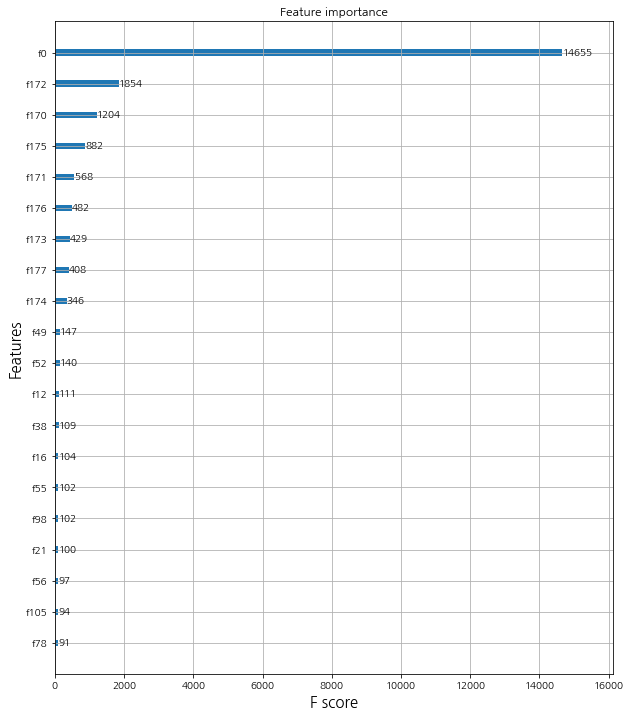

In [43]:
from xgboost import plot_importance

plot_importance(xgb_reg, max_num_features=20)

fig = plt.gcf()
fig.set_size_inches(10, 12)

## LightGBM

In [44]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor(n_estimators=500)
lgb_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000,
        verbose = False)

LGBMRegressor(n_estimators=500)

In [45]:
lgb_pred = lgb_reg.predict(X_test)
print(lgb_pred[:10])

[-0.00042993 -0.01514088 -0.0013512  -0.00030946  0.25795773  0.12924492
  0.01424404 -0.00935176  0.00060574  0.02256905]


In [46]:
print(y_test[:10])

[0.         0.         0.         0.         0.28762349 0.26187457
 0.         0.         0.         0.        ]


In [47]:
mean_squared_error(y_test, lgb_pred)

0.004008928445972199

## Deep Neural Network

In [215]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn import functional as F
import tqdm

dX_train, dy_train = torch.tensor(X_train), torch.tensor(y_train)
dX_test, dy_test = torch.tensor(X_test), torch.tensor(y_test)

train_dataset = TensorDataset(dX_train, dy_train)
test_dataset = TensorDataset(dX_test, dy_test)

In [222]:
BATCH_SIZE = 256
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

In [223]:
from model import Model
model = Model(input_size = dX_train.shape[1], hidden_size = 256)

In [224]:
from torch.optim import Adam
from train import Trainer

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cpu


Model(
  (dense1): Linear(in_features=178, out_features=256, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dense2): Linear(in_features=256, out_features=256, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (dense3): Linear(in_features=256, out_features=256, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (out): Linear(in_features=256, out_features=1, bias=True)
)

In [225]:
MSE = nn.MSELoss(reduction = 'mean')
trainer = Trainer(model, train_loader, test_loader, criterion = MSE, optimizer = Adam,
                  epochs = 150, lr = 0.001, l2_norm =0.05, device = device)
trainer.fit()

 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 104.65it/s]

epoch: 1/150, train_loss: 0.03998131, val_loss: 0.01041962


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 108.30it/s]

epoch: 2/150, train_loss: 0.01613150, val_loss: 0.00853648


 26%|█████████████████████▍                                                             | 8/31 [00:00<00:00, 72.11it/s]

epoch: 3/150, train_loss: 0.01068569, val_loss: 0.00956330


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 118.45it/s]

epoch: 4/150, train_loss: 0.00921089, val_loss: 0.00823809


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 108.61it/s]

epoch: 5/150, train_loss: 0.00871165, val_loss: 0.00763430


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 118.47it/s]

epoch: 6/150, train_loss: 0.00894236, val_loss: 0.00792263


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 106.05it/s]

epoch: 7/150, train_loss: 0.00846647, val_loss: 0.00734417


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 114.62it/s]

epoch: 8/150, train_loss: 0.00792890, val_loss: 0.00785897


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 118.68it/s]

epoch: 9/150, train_loss: 0.00749885, val_loss: 0.00748481


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.72it/s]

epoch: 10/150, train_loss: 0.00836027, val_loss: 0.00810554


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 120.63it/s]

epoch: 11/150, train_loss: 0.00728229, val_loss: 0.00745868


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 117.39it/s]

epoch: 12/150, train_loss: 0.00684269, val_loss: 0.00717369


 19%|████████████████                                                                   | 6/31 [00:00<00:00, 54.84it/s]

epoch: 13/150, train_loss: 0.00659419, val_loss: 0.00721668


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 113.47it/s]

epoch: 14/150, train_loss: 0.00646409, val_loss: 0.00690847


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.48it/s]

epoch: 15/150, train_loss: 0.00639698, val_loss: 0.00787110


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.45it/s]

epoch: 16/150, train_loss: 0.00671287, val_loss: 0.00687529


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 113.41it/s]

epoch: 17/150, train_loss: 0.00644603, val_loss: 0.00681241


 23%|██████████████████▋                                                                | 7/31 [00:00<00:00, 67.51it/s]

epoch: 18/150, train_loss: 0.00656097, val_loss: 0.00670316


 35%|█████████████████████████████                                                     | 11/31 [00:00<00:00, 95.33it/s]

epoch: 19/150, train_loss: 0.00614379, val_loss: 0.00681326


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 103.00it/s]

epoch: 20/150, train_loss: 0.00596841, val_loss: 0.00714551


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.37it/s]

epoch: 21/150, train_loss: 0.00577082, val_loss: 0.00694239


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 115.61it/s]

epoch: 22/150, train_loss: 0.00581385, val_loss: 0.00660923


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 115.64it/s]

epoch: 23/150, train_loss: 0.00582599, val_loss: 0.00699955


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 112.64it/s]

epoch: 24/150, train_loss: 0.00606453, val_loss: 0.00694244


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 114.63it/s]

epoch: 25/150, train_loss: 0.00639848, val_loss: 0.00691120


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 114.54it/s]

epoch: 26/150, train_loss: 0.00608990, val_loss: 0.00723650


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 106.00it/s]

epoch: 27/150, train_loss: 0.00589128, val_loss: 0.00672811


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 121.72it/s]

epoch: 28/150, train_loss: 0.00562799, val_loss: 0.00706170


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 94.53it/s]

epoch: 29/150, train_loss: 0.00609387, val_loss: 0.00636733


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 121.25it/s]

epoch: 30/150, train_loss: 0.00558396, val_loss: 0.00698892


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 116.82it/s]

epoch: 31/150, train_loss: 0.00586925, val_loss: 0.00641991


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 100.10it/s]

epoch: 32/150, train_loss: 0.00533109, val_loss: 0.00648373


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 116.76it/s]

epoch: 33/150, train_loss: 0.00560390, val_loss: 0.00677732


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 119.53it/s]

epoch: 34/150, train_loss: 0.00515733, val_loss: 0.00691375


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 114.22it/s]

epoch: 35/150, train_loss: 0.00563883, val_loss: 0.00653638


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 114.30it/s]

epoch: 36/150, train_loss: 0.00517428, val_loss: 0.00654457


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.49it/s]

epoch: 37/150, train_loss: 0.00510022, val_loss: 0.00700002


 29%|████████████████████████                                                           | 9/31 [00:00<00:00, 84.75it/s]

epoch: 38/150, train_loss: 0.00512471, val_loss: 0.00705789


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 94.80it/s]

epoch: 39/150, train_loss: 0.00534770, val_loss: 0.00653376


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.08it/s]

epoch: 40/150, train_loss: 0.00487807, val_loss: 0.00620322


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 106.17it/s]

epoch: 41/150, train_loss: 0.00482825, val_loss: 0.00652085


 16%|█████████████▍                                                                     | 5/31 [00:00<00:00, 45.70it/s]

epoch: 42/150, train_loss: 0.00504345, val_loss: 0.00777070


 45%|████████████████████████████████████▌                                            | 14/31 [00:00<00:00, 122.38it/s]

epoch: 43/150, train_loss: 0.00547668, val_loss: 0.00649619


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 108.32it/s]

epoch: 44/150, train_loss: 0.00529072, val_loss: 0.00627047


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 109.41it/s]

epoch: 45/150, train_loss: 0.00492660, val_loss: 0.00613163


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 116.70it/s]

epoch: 46/150, train_loss: 0.00536336, val_loss: 0.00634535


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 97.34it/s]

epoch: 47/150, train_loss: 0.00497902, val_loss: 0.00615927


 29%|████████████████████████                                                           | 9/31 [00:00<00:00, 89.64it/s]

epoch: 48/150, train_loss: 0.00475376, val_loss: 0.00682134


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 113.42it/s]

epoch: 49/150, train_loss: 0.00477818, val_loss: 0.00660884


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 112.62it/s]

epoch: 50/150, train_loss: 0.00492746, val_loss: 0.00704765


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 117.94it/s]

epoch: 51/150, train_loss: 0.00467528, val_loss: 0.00653045


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 111.81it/s]

epoch: 52/150, train_loss: 0.00481441, val_loss: 0.00698022


 45%|████████████████████████████████████▌                                            | 14/31 [00:00<00:00, 124.54it/s]

epoch: 53/150, train_loss: 0.00467414, val_loss: 0.00617567


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 113.63it/s]

epoch: 54/150, train_loss: 0.00476314, val_loss: 0.00674064


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 112.65it/s]

epoch: 55/150, train_loss: 0.00466954, val_loss: 0.00603428


 45%|████████████████████████████████████▌                                            | 14/31 [00:00<00:00, 122.03it/s]

epoch: 56/150, train_loss: 0.00472473, val_loss: 0.00655768


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 107.01it/s]

epoch: 57/150, train_loss: 0.00475693, val_loss: 0.00694804


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 104.51it/s]

epoch: 58/150, train_loss: 0.00472838, val_loss: 0.00678066


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 105.00it/s]

epoch: 59/150, train_loss: 0.00453671, val_loss: 0.00628384


 35%|█████████████████████████████                                                     | 11/31 [00:00<00:00, 96.98it/s]

epoch: 60/150, train_loss: 0.00470013, val_loss: 0.00599393


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 120.59it/s]

epoch: 61/150, train_loss: 0.00440544, val_loss: 0.00599147


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 95.43it/s]

epoch: 62/150, train_loss: 0.00489344, val_loss: 0.00601043


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 111.41it/s]

epoch: 63/150, train_loss: 0.00441821, val_loss: 0.00605237


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 105.66it/s]

epoch: 64/150, train_loss: 0.00453328, val_loss: 0.00611649


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 118.03it/s]

epoch: 65/150, train_loss: 0.00442769, val_loss: 0.00606085


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 104.97it/s]

epoch: 66/150, train_loss: 0.00425565, val_loss: 0.00603751


 45%|████████████████████████████████████▌                                            | 14/31 [00:00<00:00, 122.91it/s]

epoch: 67/150, train_loss: 0.00428740, val_loss: 0.00604009


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 104.64it/s]

epoch: 68/150, train_loss: 0.00458348, val_loss: 0.00589328


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 113.46it/s]

epoch: 69/150, train_loss: 0.00432741, val_loss: 0.00612083


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 91.19it/s]

epoch: 70/150, train_loss: 0.00467997, val_loss: 0.00608163


 29%|████████████████████████                                                           | 9/31 [00:00<00:00, 63.12it/s]

epoch: 71/150, train_loss: 0.00419965, val_loss: 0.00619869


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 110.35it/s]

epoch: 72/150, train_loss: 0.00440114, val_loss: 0.00591647


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.49it/s]

epoch: 73/150, train_loss: 0.00417719, val_loss: 0.00606613


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 107.67it/s]

epoch: 74/150, train_loss: 0.00422523, val_loss: 0.00593913


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 117.38it/s]

epoch: 75/150, train_loss: 0.00410683, val_loss: 0.00599111


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 120.64it/s]

epoch: 76/150, train_loss: 0.00425117, val_loss: 0.00593398


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 118.56it/s]

epoch: 77/150, train_loss: 0.00415206, val_loss: 0.00601451


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 111.01it/s]

epoch: 78/150, train_loss: 0.00438789, val_loss: 0.00597956


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 102.12it/s]

epoch: 79/150, train_loss: 0.00419811, val_loss: 0.00652582


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 102.42it/s]

epoch: 80/150, train_loss: 0.00418300, val_loss: 0.00642177


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 109.92it/s]

epoch: 81/150, train_loss: 0.00429065, val_loss: 0.00617834


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 118.65it/s]

epoch: 82/150, train_loss: 0.00407047, val_loss: 0.00640954


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 110.87it/s]

epoch: 83/150, train_loss: 0.00427837, val_loss: 0.00609984


 45%|████████████████████████████████████▌                                            | 14/31 [00:00<00:00, 121.37it/s]

epoch: 84/150, train_loss: 0.00412429, val_loss: 0.00714112


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 111.21it/s]

epoch: 85/150, train_loss: 0.00418238, val_loss: 0.00603237


 45%|████████████████████████████████████▌                                            | 14/31 [00:00<00:00, 124.54it/s]

epoch: 86/150, train_loss: 0.00415122, val_loss: 0.00594857


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 109.04it/s]

epoch: 87/150, train_loss: 0.00396529, val_loss: 0.00623690


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.58it/s]

epoch: 88/150, train_loss: 0.00440093, val_loss: 0.00633461


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 119.06it/s]

epoch: 89/150, train_loss: 0.00474414, val_loss: 0.00615195


 35%|█████████████████████████████                                                     | 11/31 [00:00<00:00, 99.99it/s]

epoch: 90/150, train_loss: 0.00412324, val_loss: 0.00590287


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 112.66it/s]

epoch: 91/150, train_loss: 0.00407249, val_loss: 0.00613591


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.04it/s]

epoch: 92/150, train_loss: 0.00410542, val_loss: 0.00602147


 35%|█████████████████████████████                                                     | 11/31 [00:00<00:00, 96.91it/s]

epoch: 93/150, train_loss: 0.00403086, val_loss: 0.00603434


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 119.92it/s]

epoch: 94/150, train_loss: 0.00438632, val_loss: 0.00601855


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 97.35it/s]

epoch: 95/150, train_loss: 0.00436039, val_loss: 0.00617244


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 98.16it/s]

epoch: 96/150, train_loss: 0.00444655, val_loss: 0.00659611


 35%|█████████████████████████████                                                     | 11/31 [00:00<00:00, 96.15it/s]

epoch: 97/150, train_loss: 0.00403478, val_loss: 0.00604691


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 105.82it/s]

epoch: 98/150, train_loss: 0.00404440, val_loss: 0.00654114


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 120.04it/s]

epoch: 99/150, train_loss: 0.00453282, val_loss: 0.00640636


  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

epoch: 100/150, train_loss: 0.00449133, val_loss: 0.00608435


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 119.08it/s]

epoch: 101/150, train_loss: 0.00408454, val_loss: 0.00636309


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 106.33it/s]

epoch: 102/150, train_loss: 0.00425441, val_loss: 0.00598031


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 102.07it/s]

epoch: 103/150, train_loss: 0.00396850, val_loss: 0.00601068


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 113.70it/s]

epoch: 104/150, train_loss: 0.00387933, val_loss: 0.00601931


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 108.80it/s]

epoch: 105/150, train_loss: 0.00396486, val_loss: 0.00646140


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 125.29it/s]

epoch: 106/150, train_loss: 0.00403687, val_loss: 0.00615472


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 119.75it/s]

epoch: 107/150, train_loss: 0.00400601, val_loss: 0.00638745


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 119.07it/s]

epoch: 108/150, train_loss: 0.00415985, val_loss: 0.00729444


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 106.73it/s]

epoch: 109/150, train_loss: 0.00398744, val_loss: 0.00606221


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 106.44it/s]

epoch: 110/150, train_loss: 0.00395732, val_loss: 0.00606083


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 96.41it/s]

epoch: 111/150, train_loss: 0.00400778, val_loss: 0.00637789


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 114.54it/s]

epoch: 112/150, train_loss: 0.00410743, val_loss: 0.00595495


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 100.51it/s]

epoch: 113/150, train_loss: 0.00386400, val_loss: 0.00620662


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 105.64it/s]

epoch: 114/150, train_loss: 0.00382510, val_loss: 0.00602272


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 113.64it/s]

epoch: 115/150, train_loss: 0.00387210, val_loss: 0.00609336


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 119.86it/s]

epoch: 116/150, train_loss: 0.00390661, val_loss: 0.00600955


 32%|██████████████████████████▍                                                       | 10/31 [00:00<00:00, 96.37it/s]

epoch: 117/150, train_loss: 0.00396708, val_loss: 0.00617304


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.40it/s]

epoch: 118/150, train_loss: 0.00402414, val_loss: 0.00624056


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 107.01it/s]

epoch: 119/150, train_loss: 0.00391556, val_loss: 0.00610258


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 101.13it/s]

epoch: 120/150, train_loss: 0.00408196, val_loss: 0.00596104


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 115.65it/s]

epoch: 121/150, train_loss: 0.00383510, val_loss: 0.00596210


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.03it/s]

epoch: 122/150, train_loss: 0.00375628, val_loss: 0.00630265


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 109.11it/s]

epoch: 123/150, train_loss: 0.00379052, val_loss: 0.00610514


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.40it/s]

epoch: 124/150, train_loss: 0.00377191, val_loss: 0.00590494


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 113.42it/s]

epoch: 125/150, train_loss: 0.00374904, val_loss: 0.00613551


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 104.99it/s]

epoch: 126/150, train_loss: 0.00381483, val_loss: 0.00601126


 29%|████████████████████████                                                           | 9/31 [00:00<00:00, 87.61it/s]

epoch: 127/150, train_loss: 0.00385749, val_loss: 0.00611861


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 108.79it/s]

epoch: 128/150, train_loss: 0.00378274, val_loss: 0.00599107


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 106.76it/s]

epoch: 129/150, train_loss: 0.00385711, val_loss: 0.00591577


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.03it/s]

epoch: 130/150, train_loss: 0.00379674, val_loss: 0.00591182


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 109.76it/s]

epoch: 131/150, train_loss: 0.00387853, val_loss: 0.00596037


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 108.33it/s]

epoch: 132/150, train_loss: 0.00385180, val_loss: 0.00607927


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 118.69it/s]

epoch: 133/150, train_loss: 0.00381557, val_loss: 0.00609745


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 101.06it/s]

epoch: 134/150, train_loss: 0.00381665, val_loss: 0.00602155


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 108.17it/s]

epoch: 135/150, train_loss: 0.00373031, val_loss: 0.00612815


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.64it/s]

epoch: 136/150, train_loss: 0.00379100, val_loss: 0.00595032


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 112.35it/s]

epoch: 137/150, train_loss: 0.00380802, val_loss: 0.00635210


 71%|█████████████████████████████████████████████████████████▍                       | 22/31 [00:00<00:00, 110.93it/s]

epoch: 138/150, train_loss: 0.00400129, val_loss: 0.00596770


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 108.35it/s]

epoch: 139/150, train_loss: 0.00379513, val_loss: 0.00608583


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 107.73it/s]

epoch: 140/150, train_loss: 0.00381616, val_loss: 0.00593044


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 101.68it/s]

epoch: 141/150, train_loss: 0.00362794, val_loss: 0.00593416


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 104.23it/s]

epoch: 142/150, train_loss: 0.00393243, val_loss: 0.00601805


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 103.08it/s]

epoch: 143/150, train_loss: 0.00370714, val_loss: 0.00604345


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 101.77it/s]

epoch: 144/150, train_loss: 0.00374763, val_loss: 0.00611668


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 115.64it/s]

epoch: 145/150, train_loss: 0.00418212, val_loss: 0.00607918


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 107.38it/s]

epoch: 146/150, train_loss: 0.00422596, val_loss: 0.00615263


 39%|███████████████████████████████▎                                                 | 12/31 [00:00<00:00, 109.82it/s]

epoch: 147/150, train_loss: 0.00393334, val_loss: 0.00593395


 42%|█████████████████████████████████▉                                               | 13/31 [00:00<00:00, 117.38it/s]

epoch: 148/150, train_loss: 0.00378689, val_loss: 0.00592637


 35%|████████████████████████████▋                                                    | 11/31 [00:00<00:00, 103.96it/s]

epoch: 149/150, train_loss: 0.00379641, val_loss: 0.00596432


100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 106.16it/s]

epoch: 150/150, train_loss: 0.00378284, val_loss: 0.00590467
best mse : 0.00589328


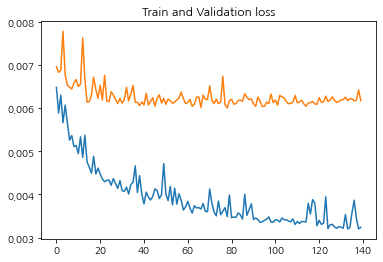

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline

history = trainer.history()

plt.plot(history['train_loss'][10:])
plt.plot(history['val_loss'][10:])
plt.title('Train and Validation loss')
plt.show()

In [226]:
trainer.evaluation(test_loader, device)

mse : 0.005893280225185056


In [227]:
model = trainer.get_best_model()
model.to('cpu')
torch.save(model.state_dict(), 'model.pt')

# Ensemble

In [228]:
import torch
from sklearn.metrics import mean_squared_error

class EnsembleRegressor:
    def __init__(self, models, weights=None):
        
        self.models = models
        self.weights = weights
        
        self.pred_list = []
        
    def predict(self, X_test):
        for i, model in enumerate(models.values()):
            if i == 0:
                self.pred_list.append(model(torch.tensor(X_test.astype(np.float32))).detach().numpy().reshape(-1,))
            else:
                self.pred_list.append(model.predict(X_test))
        preds = np.array(self.pred_list)
            

        prediction = np.average(preds, axis=0, weights=self.weights)

        return prediction
    
    def random_search(self, X_test, y_test, num_search):
        weights = torch.softmax(torch.rand(num_search, len(self.models)), axis=1).numpy()
        
        for i, model in enumerate(models.values()):
            if i == 0:
                self.pred_list.append(model(torch.tensor(X_test.astype(np.float32))).detach().numpy().reshape(-1,))
            else:
                self.pred_list.append(model.predict(X_test))
        preds = np.array(self.pred_list)

        mse = []
        for i in range(num_search):
            prediction = np.average(preds, axis=0, weights=weights[i])
            mse_ = mean_squared_error(y_test, prediction)
            mse.append(mse_)
        
        result = pd.DataFrame(weights, columns=['w1', 'w2', 'w3', 'w4', 'w5', 'w6'])
        result['MSE'] = mse

        return result.sort_values('MSE', ascending=True)

In [229]:
models = {'DNN' : model, 'DecisionTree' : dt, 'RandomForest' : rf, 'GBM' : gbm, 'XGBOOST': xgb_reg, 'LightGBM' : lgb_reg}

ensemble = EnsembleRegressor(models, weights=None)
result = ensemble.random_search(X_test, y_test, 30000)
result.head(10)

,w1,w2,w3,w4,w5,w6,MSE
10805,0.122409,0.132219,0.119248,0.119579,0.317151,0.189395,0.003481
10344,0.115085,0.128796,0.111582,0.106931,0.282464,0.255143,0.003481
9646,0.123008,0.128705,0.119659,0.105451,0.272319,0.250858,0.003493
3674,0.129325,0.117969,0.123541,0.106897,0.276047,0.246221,0.003494
12327,0.130794,0.114664,0.114572,0.113782,0.272184,0.254004,0.003498
23263,0.120547,0.123183,0.107582,0.118110,0.261459,0.269118,0.003504
29799,0.106600,0.107012,0.132349,0.119440,0.268329,0.266269,0.003505
8208,0.105934,0.139185,0.138349,0.100592,0.257762,0.258177,0.003506
351,0.156058,0.140059,0.106821,0.101324,0.261702,0.234035,0.003507
11686,0.151593,0.123236,0.112479,0.102841,0.257611,0.252242,0.003507


In [230]:
optimal_weight = result.iloc[0,:-1].tolist()
print(optimal_weight)

[0.1224088966846466, 0.1322186291217804, 0.11924777925014496, 0.11957895010709763, 0.31715109944343567, 0.18939466774463654]


In [231]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)

preds = ensemble.predict(X_test)
print(preds[:10])

[ 0.00083699 -0.00268518  0.00666672  0.00090459  0.29995906  0.16997796
  0.0141237   0.00404413  0.0009323   0.01533926]


In [232]:
print( y_test[:10])

[0.         0.         0.         0.         0.28762349 0.26187457
 0.         0.         0.         0.        ]


In [233]:
mean_squared_error(y_test, preds)

0.003480877403688197

# Evaluation

In [234]:
inverse_transformed_pred = np.expm1(preds * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)
inverse_transformed_y_test = np.expm1(y_test * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)

print(inverse_transformed_pred[:10])
print(inverse_transformed_y_test[:10])

[ 1.48599722e-02 -4.62197953e-02  1.24670675e-01  1.60696238e-02
  1.96610671e+02  1.89971488e+01  2.82623641e-01  7.38724817e-02
  1.65659905e-02  3.10396808e-01]
[  0.   0.   0.   0. 158. 100.   0.   0.   0.   0.]


In [235]:
np.sqrt(mean_squared_error(inverse_transformed_y_test, inverse_transformed_pred))

310401.85521444125

# Prediction

In [236]:
test_set = pd.read_excel('test_set.xlsx')

test_set.head()

,시도/청,시군구/관리소,임가번호,구분(재배/채취),구분(재배/채취).1,구분(재배/채취).2,Unnamed: 6,구분(재배/채취).3,품목,품목.1,품목.2,품목.3,최종값,Unnamed: 13,Unnamed: 14,비고,점검사항,등록자,최초등록일,최종수정일
0,NaN,NaN,NaN,재배채취,재배기준,재배면적,환산면적,재배단위,대분류,중분류,소분류,품목단위,생산량,단가,생산액,NaN,NaN,NaN,NaN,NaN
1,부산광역시,기장군,NaN,재배,NaN,118800,0,㎡,수실,재배수실,밤,kg,7334,980,7187320,NaN,NaN,NaN,NaN,NaN
2,대구광역시,달성군,NaN,재배,NaN,33375,0,㎡,수실,재배수실,밤,kg,194,2853.335052,553547,NaN,NaN,NaN,NaN,NaN
3,대구광역시,동구,NaN,재배,NaN,42900,0,㎡,수실,재배수실,밤,kg,8559,2538.461503,21726692,NaN,NaN,NaN,NaN,NaN
4,인천광역시,강화군,NaN,재배,NaN,23100,0,㎡,수실,재배수실,밤,kg,7693,3500,26925500,NaN,NaN,NaN,NaN,NaN


In [237]:
def predict(model, test_set):
    data = test_set.iloc[1:, [1, 3, 5, 7, 10]]
    data.rename(columns={'구분(재배/채취)' : '재배채취',
                         '구분(재배/채취).1' : '재배기준',
                         '구분(재배/채취).2' : '재배면적',
                         '구분(재배/채취).3' : '재배단위',
                         'Unnamed: 6' : '환산면적',
                         '품목' : '품목 대분류',
                         '품목.1' : '품목 중분류',
                         '품목.2' : '품목 소분류',
                         '최종값' : '생산량'},
                inplace = True)
    
    data['재배면적'] = np.log1p(data['재배면적'].astype(float))
    
    # Normalize
    X_scaled = X_minmax_scaler.transform(data.loc[:, ['재배면적']])
    
    # Categorical variable preprocessing
    onehot = onehot_encoder.transform(data.loc[:, ['시군구/관리소', '재배채취', '품목 소분류']])
    
    numeric_data_df = pd.DataFrame(X_scaled, columns=['재배면적'])
    onehot_data_df = pd.DataFrame(onehot.toarray())

    X_data_df = pd.concat([numeric_data_df , onehot_data_df], axis=1)
    X_data = np.array(X_data_df)
    
    y_pred = model.predict(X_data)
    inverse_transformed_pred = np.expm1(y_pred * y_minmax_scaler.data_range_ + y_minmax_scaler.data_min_)
    
    return inverse_transformed_pred

In [238]:
ensemble = EnsembleRegressor(models, weights=optimal_weight)
preds = predict(ensemble, test_set)
print(preds[:10])

[7.07405713e+03 3.88852962e+02 6.79025747e+03 3.36110955e+03
 2.01613862e+03 2.66943629e+03 4.42001474e+02 5.74228231e+03
 5.96157117e+05 2.40302612e+04]


In [239]:
result = pd.concat([test_set.loc[1:, '최종값'].reset_index(drop=True), pd.Series(preds, name='예측값')], axis=1)
result

,최종값,예측값
0,7334,7074.057131
1,194,388.852962
2,8559,6790.257468
3,7693,3361.109554
4,1344,2016.138618
...,...,...
217,17948,11056.998498
218,150,82.770636
219,21,93.075878
220,9405,12952.788540


In [240]:
np.sqrt(mean_squared_error(result['최종값'], result['예측값']))

520821.18488479784